# Inaugural Project

Imports and set magics:

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm # for colormaps

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject

# Functions

In [17]:
# I couldn't get the py file to work so all functions are here instead.
def utility(x, alpha):
    ### Takes values for x1, x2, and alpha and calculates the utility
    x1, x2 = x
    u = (x1**(alpha)) * (x2**(1-alpha))
    return u

def demand_x1(p1, p2, omega1, omega2, alpha):
    ### Takes prices, endowments, and alpha and returns the individuals demand for x1
    y = (alpha/p1)*(p1*omega1 + p2*omega2)
    return y

def demand_x2(p1, p2, omega1, omega2, alpha):
    ### Takes prices, endowments, and alpha and returns the individuals demand for x2
    y = ((1-alpha)/p2)*(p1*omega1 + p2*omega2)
    return y

def error(x_A, x_B, omega_A, omega_B):
    ### Takes the demand and endowments from both individual and calculates the error in the market clearing condition
    y = abs(x_A - omega_A + x_B - omega_B)
    return y

def objective_function_Q3(p1):
    ### Takes p1 and calculates the error in the market clearing condition for good 1
    x_1A = demand_x1(p1, p2, omega_A1, omega_A2, alpha)
    x_1B = demand_x1(p1, p2, omega_B1, omega_B2, beta)
    return abs(error(x_1A, x_1B, omega_A1, omega_B1))

def objective_function_Q4(p1):
    ### Takes p1 and calculates the utility of person A
    x_1B = demand_x1(p1, p2, omega_B1, omega_B2, beta)
    x_2B = demand_x2(p1, p2, omega_B1, omega_B2, beta)
    return -utility((max(0,1-x_1B), max(0,1-x_2B)), alpha)

def constraint_func_Q5(x):
    ### Takes a set of x1 and x2 and checks whether person B's utility is at least the same as with his endowment
    x1_A, x2_A = x[:2]
    y = utility((max(0,1-x1_A), max(0,1-x2_A)), beta) - utility((omega_B1, omega_B2), beta)
    return y

def objective_func_Q5(x):
    ### Takes x1 and x2 and calucaltes the utility of person A
    x1_A, x2_A = x[:2]
    return -utility((x1_A, x2_A), alpha)

def totalUtility(x):
    ### Takes x1 and x2 for person A and returns the total utility of both person A and B
    x1_A, x2_A = x[:2]
    y = utility((x1_A, x2_A), alpha) + utility((1-x1_A, 1-x2_A), beta)
    return -y


In [13]:
#Setting Initial Values
omega_A1 = 0.8
omega_A2 = 0.3
omega_B1 = 1 - omega_A1
omega_B2 = 1 - omega_A2
N = 75
p1 = 1.5
p2 = 1
alpha = 1/3
beta = 2/3

u_A_0 = utility((omega_A1, omega_A2), alpha) #Calculates endowment utility of person A
u_B_0 = utility((omega_B1, omega_B2), beta) #Calculates endowment utility of person B

# Question 1

**Explain how you solve the model**

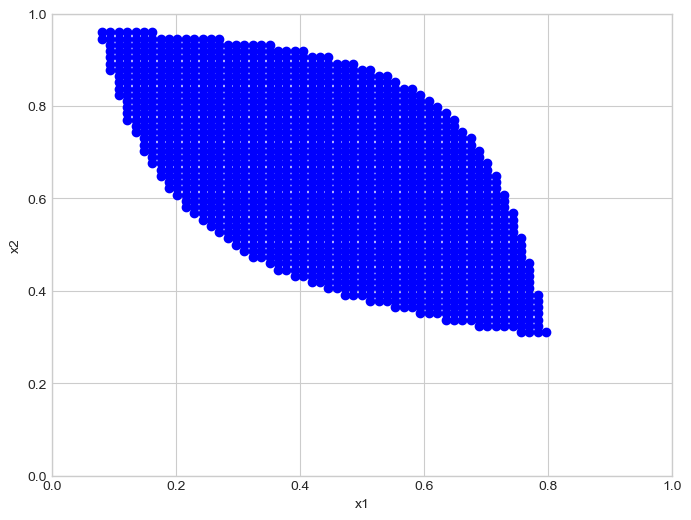

In [14]:
# code for solving the model (remember documentation and comments)

#Setting Initial Values
omega_A1 = 0.8
omega_A2 = 0.3
omega_B1 = 1 - omega_A1
omega_B2 = 1 - omega_A2
N = 75
p1 = 1.5
p2 = 1
alpha = 1/3
beta = 2/3

u_A_0 = utility((omega_A1, omega_A2), alpha) #Calculates endowment utility of person A
u_B_0 = utility((omega_B1, omega_B2), beta) #Calculates endowment utility of person B

#Creates the NxN grid
x1_vec = np.linspace(0,1,N)
x2_vec = np.linspace(0,1,N)
x1_grid,x2_grid = np.meshgrid(x1_vec,x2_vec,indexing='ij')

#Calculates utility for both individuals for all points on the grid
u_A_grid = utility((x1_grid,x2_grid), alpha)
u_B_grid = utility((1-x1_grid,1-x2_grid), beta)

#Checks if both individuals have higher utility than with endowment
u_A_grid_check = u_A_grid >= u_A_0
u_B_grid_check = u_B_grid >= u_B_0
final = np.logical_and(u_A_grid_check, u_B_grid_check)

#Creates a figure
plt.figure(figsize=(8, 6))
plt.scatter(x1_grid[final], x2_grid[final], color='blue')
plt.scatter(x1_grid[~final], x2_grid[~final], color='none')
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(0, 1)
plt.ylim(0, 1) 
plt.grid(True)
plt.show()


# Question 2

Explain your code and procedure

In [15]:
p1_grid = np.linspace(0.5, 2.5, N) #Creates the possible values of p1



for p1 in p1_grid:
    ### Loops through values of p1 and calculates demand and the error in the market clearing
    x_1A = demand_x1(p1, p2, omega_A1, omega_A2, alpha)
    x_2A = demand_x2(p1, p2, omega_A1, omega_A2, alpha)
    x_1B = demand_x1(p1, p2, omega_B1, omega_B2, beta)
    x_2B = demand_x2(p1, p2, omega_B1, omega_B2, beta)
    y1 = error(x_1A, x_1B, omega_A1, omega_B1)
    y2 = error(x_2A, x_2B, omega_A2, omega_B2)
    print(f"p1 = {p1} and error 1 is {y1} and error 2 is {y2}")

p1 = 0.5 and error 1 is 0.533333333333333 and error 2 is 0.2666666666666666
p1 = 0.527027027027027 and error 1 is 0.4752136752136752 and error 2 is 0.2504504504504504
p1 = 0.5540540540540541 and error 1 is 0.4227642276422763 and error 2 is 0.23423423423423412
p1 = 0.5810810810810811 and error 1 is 0.3751937984496122 and error 2 is 0.2180180180180178
p1 = 0.6081081081081081 and error 1 is 0.33185185185185184 and error 2 is 0.20180180180180163
p1 = 0.6351351351351351 and error 1 is 0.29219858156028344 and error 2 is 0.18558558558558547
p1 = 0.6621621621621622 and error 1 is 0.25578231292516995 and error 2 is 0.1693693693693693
p1 = 0.6891891891891893 and error 1 is 0.22222222222222193 and error 2 is 0.15315315315315303
p1 = 0.7162162162162162 and error 1 is 0.1911949685534589 and error 2 is 0.13693693693693687
p1 = 0.7432432432432432 and error 1 is 0.1624242424242423 and error 2 is 0.1207207207207206
p1 = 0.7702702702702703 and error 1 is 0.1356725146198829 and error 2 is 0.1045045045045

# Question 3

Explain your code and procedure

In [18]:
from scipy import optimize

#Finds the optimal value for p1 to minimize the error
p1_guess = 0.75
res = optimize.minimize(objective_function_Q3, p1_guess, method = "Nelder-Mead")
print(res.x)

#Defining values for 6b
Q3_x1A = demand_x1(res.x, p2, omega_A1, omega_A2, alpha) #Calculates x1 with the optimal price
Q3_x2A = demand_x2(res.x, p2, omega_A1, omega_A2, alpha) #Calculates x2 with the optimal price
print(Q3_x1A)
print(Q3_x2A)


[0.94445801]
[0.3725475]
[0.70371094]


With the initial values set, the market clears with a price of 0.94. This gives individual A 0.37 units of x1 and 0.7 units of x2. Thus a lot of trading takes place since individual A starts with 0.8 units of x1 and 0.3 units of x2. It makes sense because individual A values x2 higher and individual B values x1 higher.

# Question 4a

In [ ]:
#Setting initial values
p1_best, u_best = -1,-1
x1_A_best, x2_A_best = 0, 0

#Looping through grid, calculating utility and checking if it is the best so far
for p1 in p1_grid:
    x_1B = demand_x1(p1, p2, omega_B1, omega_B2, beta)
    x_2B = demand_x2(p1, p2, omega_B1, omega_B2, beta)
    u = utility((max(0, 1-x_1B), max(0,1-x_2B)), alpha)
    if u >= u_best: #Updating if it is best so far
        u_best = u
        p1_best = p1
        x1_A_best = 1-x_1B
        x2_A_best = 1-x_2B

print(f"Optimal price: {p1_best}")
print(f"Person A utility {u_best}")

#Defining values for 6b
Q4_x1A = x1_A_best
Q4_x2A = x2_A_best

Optimal price: 1.9054054054054055
Person A utility 0.6336197517392991


# Question 4b

In [ ]:
p1_guess = 1.75
res = optimize.minimize(objective_function_Q4,p1_guess, method = "Nelder-Mead")
print(res.x)

Q4b_x1A = 1 - demand_x1(res.x, p2, omega_B1, omega_B2, beta)
Q4b_x2A = 1 - demand_x2(res.x, p2, omega_B1, omega_B2, beta)

print(Q4b_x1A)
print(Q4b_x2A)

[1.89936523]
[0.62097055]
[0.64004232]


# Question 5a

In [ ]:
u_best, x1_A_best, x2_A_best = 0,0,0
for i in range(0,N+1): 
    for j in range(0, N+1):
        if utility((1-i/N, 1-j/N),beta) >= utility((omega_B1, omega_B2), beta):
            if utility((i/N, j/N), alpha) > u_best:
                u_best = utility((i/N, j/N), alpha)
                x1_A_best = i/N
                x2_A_best = j/N


print(x1_A_best)
print(x2_A_best)
print(u_best)

0.56
0.8533333333333334
0.7415523509091093


# Question 5b

In [ ]:
guess = [0.5, 0.8]

constraints = {'type': 'ineq', 'fun': constraint_func_Q5}
bounds = [(0, 1), (0, 1)]

result = optimize.minimize(objective_func_Q5, guess, constraints=constraints, bounds=bounds)

optimized_allocation = result.x[:2]

print("Optimized allocation for person A:", optimized_allocation)
print(f"Utility: {utility((result.x[0], result.x[1]), alpha)}")

Q5_x1, Q5_x2 = result.x[:2]


Optimized allocation for person A: [0.57574412 0.84443853]
Utility: 0.7432276587014279


# Question 6a

In [ ]:
#Calculating optimal distribution of goods from social view
bounds = [(0, 1), (0, 1)]
guess = (0.6, 0.4)
res = optimize.minimize(totalUtility, guess, bounds=bounds)
print(res.x)
Q6_x1, Q6_x2 = res.x[:2]

[0.33333391 0.66666604]


# Question 6b

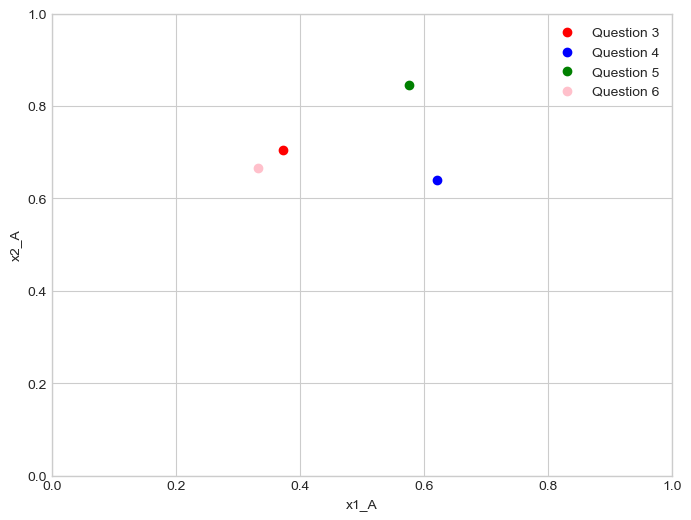

In [ ]:
#Creating figure
plt.figure(figsize=(8, 6))
plt.scatter(Q3_x1A, Q3_x2A, color='Red', label = "Question 3")
plt.scatter(Q4b_x1A, Q4b_x2A, color='blue', label = "Question 4")
plt.scatter(Q5_x1, Q5_x2, color='Green', label = "Question 5")
plt.scatter(Q6_x1, Q6_x2, color='Pink', label = "Question 6")
plt.legend()
plt.xlabel('x1_A')
plt.ylabel('x2_A')
plt.xlim(0, 1)
plt.ylim(0, 1) 
plt.grid(True)
plt.show()

The allocation in question 6 gives the largest total utility for society. However, this does not take any equality into account. In this case, the utility functions are such that the individuals are equal but this is not the case for all utility functions. Question 3 solves through the market and thus makes people trade if it increases their utility. A downside to this is that the initial endowment will play a big role in how much utility an individual will end up with. Question 4 allows individual A to choose a price. This is obviously an unfair advantage for individual A but has the benefit that both individuals are free to trade if they want and the trades will increase utility. Lastly, Question 5 solves by letting individual A choose consumption as long as B isn't worse off. This allows individual A to take all the surplus from any "trading"

# Question 7

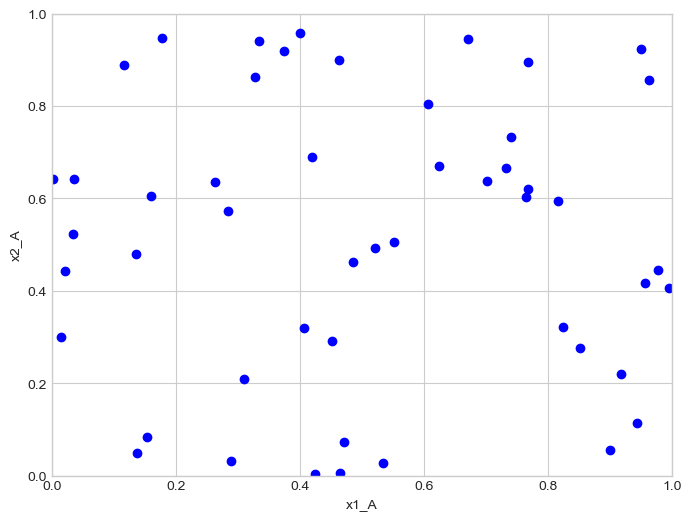

In [ ]:
#Drawing random numbers and assigning them to lists
np.random.seed(12)
w = np.random.uniform(size = 50)
v = np.random.uniform(size = 50)
#print(w)
#print(v)

#Creating figure
plt.figure(figsize=(8, 6))
plt.scatter(w, v, color='blue')
plt.xlabel('x1_A')
plt.ylabel('x2_A')
plt.xlim(0, 1)
plt.ylim(0, 1) 
plt.grid(True)
plt.show()

# Question 8

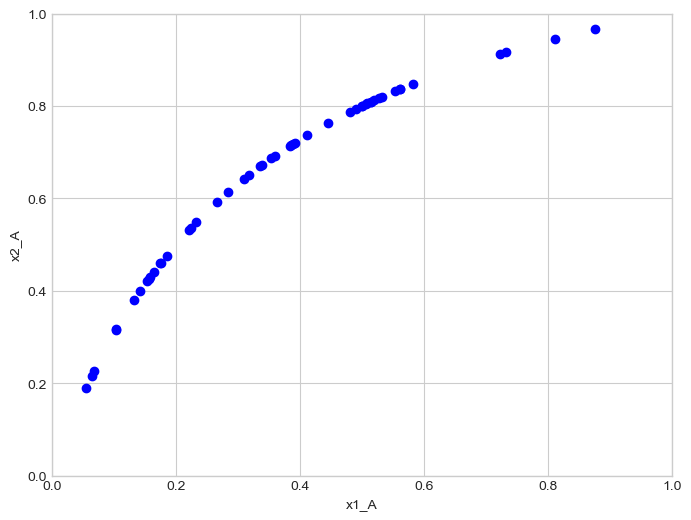

In [ ]:
x1 = np.zeros(50)
x2 = np.zeros(50)

#Calculating equilibrium for each of the 50 random draws
for i in range(0,50):
    p1_guess = 0.75
    omega_A1 = w[i]
    omega_A2 = v[i]
    omega_B1 = 1-w[i]
    omega_B2 = 1-v[i]
    res = optimize.minimize(objective_function_Q3, p1_guess, method = "Nelder-Mead")
    #print(res.x)
    x1[i] = demand_x1(res.x, p2, omega_A1, omega_A2, alpha)
    x2[i] = demand_x2(res.x, p2, omega_A1, omega_A2, alpha)
    

#Creating figure
plt.figure(figsize=(8, 6))
plt.scatter(x1, x2, color='blue')
plt.xlabel('x1_A')
plt.ylabel('x2_A')
plt.xlim(0, 1)
plt.ylim(0, 1) 
plt.grid(True)
plt.show()